# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [18]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [19]:
# Create empty lists and counters for record and set

city_name = []
latitude = []
longitude = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
countries = []
date_time = []
record_counter = 0
set_counter = 1

# Print initial output as shown

print("Beginning Data Retrieval")
print("-----------------------------")

# Construct query URL

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="

# Create for loop

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        countries.append(response["sys"]["country"])
        date_time.append(response["dt"])
        
        if record_counter > 48:
            record_counter = 0
            set_counter = set_counter + 1
        
        else:
            record_counter = record_counter + 1
        
        print(f"Processing Record {record_counter} of Set {set_counter} | {city}")
        
    except (KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | hede
Processing Record 2 of Set 1 | new norfolk
Processing Record 3 of Set 1 | khor
Processing Record 4 of Set 1 | khatanga
Processing Record 5 of Set 1 | upernavik
Processing Record 6 of Set 1 | westport
Processing Record 7 of Set 1 | port hardy
Processing Record 8 of Set 1 | santa rosa
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | nanortalik
Processing Record 11 of Set 1 | sinazongwe
Processing Record 12 of Set 1 | vestmannaeyjar
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | chuy
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | sorland
Processing Record 19 of Set 1 | curillo
Processing Record 20 of Set 1 | qaanaaq
City not found. Skipping...
City not found. Skipping...
Processing Record 21 of Set 1 | ixtapa
Processing Record 22 of Set 1 | leh
Proces

Processing Record 43 of Set 4 | thompson
Processing Record 44 of Set 4 | bubaque
Processing Record 45 of Set 4 | vestmanna
Processing Record 46 of Set 4 | sao francisco do sul
Processing Record 47 of Set 4 | alofi
Processing Record 48 of Set 4 | rio gallegos
Processing Record 49 of Set 4 | aden
Processing Record 0 of Set 5 | sayansk
Processing Record 1 of Set 5 | valdivia
Processing Record 2 of Set 5 | marienburg
Processing Record 3 of Set 5 | lagoa
Processing Record 4 of Set 5 | saint-philippe
Processing Record 5 of Set 5 | uray
Processing Record 6 of Set 5 | boguchany
Processing Record 7 of Set 5 | northam
Processing Record 8 of Set 5 | ensenada
Processing Record 9 of Set 5 | tuatapere
Processing Record 10 of Set 5 | pushkino
Processing Record 11 of Set 5 | ruteng
Processing Record 12 of Set 5 | dunedin
Processing Record 13 of Set 5 | vardo
Processing Record 14 of Set 5 | daru
Processing Record 15 of Set 5 | ponta do sol
Processing Record 16 of Set 5 | mahebourg
City not found. Skipp

Processing Record 31 of Set 8 | tilichiki
Processing Record 32 of Set 8 | saint-joseph
Processing Record 33 of Set 8 | plouzane
Processing Record 34 of Set 8 | vostok
Processing Record 35 of Set 8 | sistranda
Processing Record 36 of Set 8 | honolulu
Processing Record 37 of Set 8 | mangrol
Processing Record 38 of Set 8 | alice springs
Processing Record 39 of Set 8 | talcahuano
Processing Record 40 of Set 8 | torbay
Processing Record 41 of Set 8 | pevek
Processing Record 42 of Set 8 | grindavik
Processing Record 43 of Set 8 | mount barker
City not found. Skipping...
Processing Record 44 of Set 8 | najran
Processing Record 45 of Set 8 | san cristobal
Processing Record 46 of Set 8 | port macquarie
Processing Record 47 of Set 8 | sao felix do xingu
Processing Record 48 of Set 8 | pimentel
Processing Record 49 of Set 8 | uvat
Processing Record 0 of Set 9 | nyurba
Processing Record 1 of Set 9 | maningrida
Processing Record 2 of Set 9 | zakamensk
Processing Record 3 of Set 9 | hammerfest
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
# Create DataFrame

weather_df = pd.DataFrame({"City": city_name, "Lat": latitude, "Lng": longitude, "Max Temp": max_temp, "Humidity": humidity, "Cloudiness": cloudiness, "Wind Speed": wind_speed, "Country": countries, "Date": date_time})
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hede,33.7681,120.2517,56.52,55,0,6.96,CN,1615688137
1,New Norfolk,-42.7826,147.0587,64.00,50,29,5.01,AU,1615688137
2,Khor,47.8861,134.9464,30.99,94,0,4.88,RU,1615688138
3,Khatanga,71.9667,102.5000,-16.96,91,84,14.07,RU,1615688138
4,Upernavik,72.7868,-56.1549,-5.13,99,100,4.72,GL,1615688139
...,...,...,...,...,...,...,...,...,...
558,Baracoa,20.3467,-74.4958,73.81,86,30,11.12,CU,1615688313
559,Nanzhang,31.7765,111.8386,64.27,68,52,7.99,CN,1615688313
560,Balad,34.0164,44.1453,53.76,42,0,4.85,IQ,1615688314
561,Mananjary,-21.2167,48.3333,72.82,91,15,7.81,MG,1615688314


In [21]:
# Export DataFrame as .csv file

weather_df.to_csv("output_data/cities.csv", index = False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

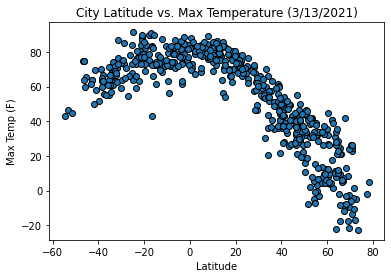

In [60]:
# Create plot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], edgecolor = "black")

# Title plot and label axes
plt.title("City Latitude vs. Max Temperature (3/13/2021)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

# Save graph as .png
plt.savefig("png_Files/City Latitude vs. Max Temperature.png")

## Latitude vs. Humidity Plot

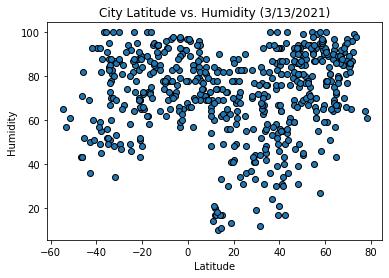

In [61]:
# Create plot
plt.scatter(weather_df["Lat"], weather_df["Humidity"], edgecolor = "black")

# Title plot and label axes
plt.title("City Latitude vs. Humidity (3/13/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save graph as .png
plt.savefig("png_Files/City Latitude vs. Humidity.png")

## Latitude vs. Cloudiness Plot

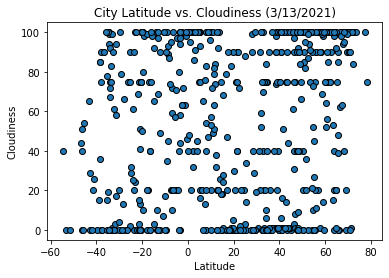

In [62]:
# Create plot
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], edgecolor = "black")

# Title plot and label axes
plt.title("City Latitude vs. Cloudiness (3/13/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save graph as .png
plt.savefig("png_Files/City Latitude vs. Cloudiness.png")

## Latitude vs. Wind Speed Plot

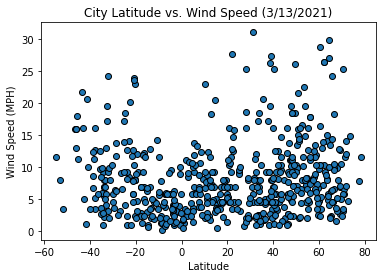

In [63]:
# Create plot
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], edgecolor = "black")

# Title plot and label axes
plt.title("City Latitude vs. Wind Speed (3/13/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")

# Save graph as .png
plt.savefig("png_Files/City Latitude vs. Wind Speed.png")

## Linear Regression

In [64]:
# Split data into Northern and Southern hemispheres

northern_hemisphere = weather_df.loc[weather_df["Lat"]>=0]
southern_hemisphere = weather_df.loc[weather_df["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: -0.91


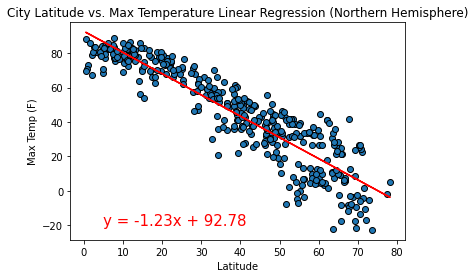

In [65]:
# Define x values and y values
x_values_1 = northern_hemisphere["Lat"]
y_values_1 = northern_hemisphere["Max Temp"]

# Calculate correlation coefficient
correlation = st.pearsonr(x_values_1, y_values_1)
print(f"The r-squared value is: {round(correlation[0],2)}")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values_1, y_values_1)
regress_values = x_values_1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot with best fit line
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"], edgecolor = "black")
plt.plot(x_values_1, regress_values,"r-")

# Title plot and label axes and best fit line
plt.title("City Latitude vs. Max Temperature Linear Regression (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.annotate(line_eq,(5, -20),fontsize=15,color="red")

# Save graph as .png
plt.savefig("png_Files/City Latitude vs. Max Temp Linear Regression Northern Hemisphere.png")

There is a very strong negative correlation between latitude and maximum temperature for the northern hemisphere.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.57


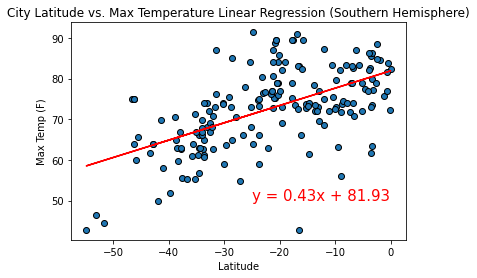

In [66]:
# Define x values and y values
x_values_2 = southern_hemisphere["Lat"]
y_values_2 = southern_hemisphere["Max Temp"]

# Calculate correlation coefficient
correlation = st.pearsonr(x_values_2, y_values_2)
print(f"The r-squared value is: {round(correlation[0],2)}")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values_2, y_values_2)
regress_values = x_values_2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot with best fit line
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"], edgecolor = "black")
plt.plot(x_values_2, regress_values,"r-")

# Title plot and label axes and best fit line
plt.title("City Latitude vs. Max Temperature Linear Regression (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.annotate(line_eq,(-25, 50),fontsize=15,color="red")

# Save graph as .png
plt.savefig("png_Files/City Latitude vs. Max Temp Linear Regression Southern Hemisphere.png")

There is a moderate positive correlation between latitude and max temperature for the southern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.29


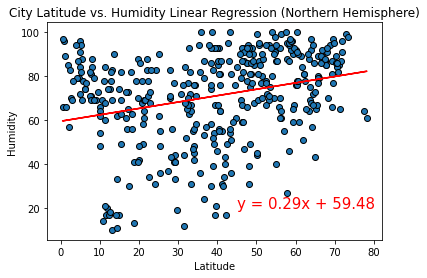

In [67]:
# Define x values and y values
x_values_3 = northern_hemisphere["Lat"]
y_values_3 = northern_hemisphere["Humidity"]

# Calculate correlation coefficient
correlation = st.pearsonr(x_values_3, y_values_3)
print(f"The r-squared value is: {round(correlation[0],2)}")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values_3, y_values_3)
regress_values = x_values_3 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot with best fit line
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Humidity"], edgecolor = "black")
plt.plot(x_values_3, regress_values,"r-")

# Title plot and label axes and best fit line
plt.title("City Latitude vs. Humidity Linear Regression (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(45, 20),fontsize=15,color="red")

# Save graph as .png
plt.savefig("png_Files/City Latitude vs. Humidity Linear Regression Northern Hemisphere.png")

There is a weak positive correlation between city latitude and humidity for the northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.32


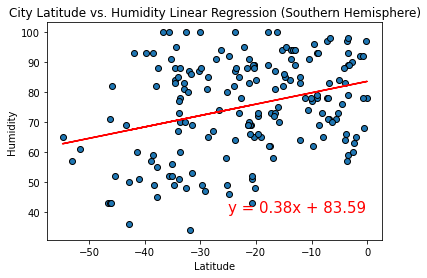

In [68]:
# Define x values and y values
x_values_4 = southern_hemisphere["Lat"]
y_values_4 = southern_hemisphere["Humidity"]

# Calculate correlation coefficient
correlation = st.pearsonr(x_values_4, y_values_4)
print(f"The r-squared value is: {round(correlation[0],2)}")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values_4, y_values_4)
regress_values = x_values_4 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot with best fit line
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Humidity"], edgecolor = "black")
plt.plot(x_values_4, regress_values,"r-")

# Title plot and label axes and best fit line
plt.title("City Latitude vs. Humidity Linear Regression (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(-25, 40),fontsize=15,color="red")

# Save graph as .png
plt.savefig("png_Files/City Latitude vs. Humidity Linear Regression Southern Hemisphere.png")

There is a weak positive correlation between city latitude and humidity for the southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.23


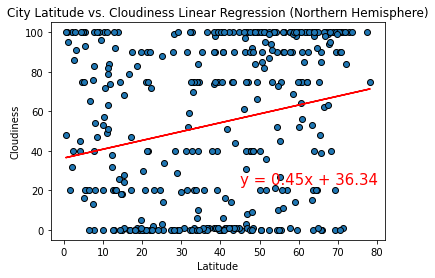

In [69]:
# Define x values and y values
x_values_5 = northern_hemisphere["Lat"]
y_values_5 = northern_hemisphere["Cloudiness"]

# Calculate correlation coefficient
correlation = st.pearsonr(x_values_5, y_values_5)
print(f"The r-squared value is: {round(correlation[0],2)}")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values_5, y_values_5)
regress_values = x_values_5 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot with best fit line
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"], edgecolor = "black")
plt.plot(x_values_5, regress_values,"r-")

# Title plot and label axes and best fit line
plt.title("City Latitude vs. Cloudiness Linear Regression (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(45, 23),fontsize=15,color="red")

# Save graph as .png
plt.savefig("png_Files/City Latitude vs. Cloudiness Northern Hemisphere Linear Regression.png")

There is a weak positive correlation between city latitude and cloudiness for the northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.24


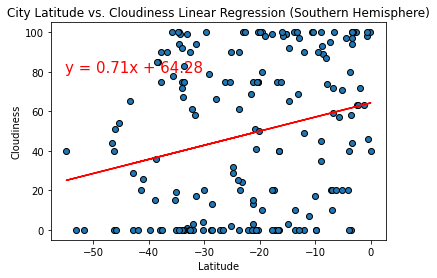

In [70]:
# Define x values and y values
x_values_6 = southern_hemisphere["Lat"]
y_values_6 = southern_hemisphere["Cloudiness"]

# Calculate correlation coefficient
correlation = st.pearsonr(x_values_6, y_values_6)
print(f"The r-squared value is: {round(correlation[0],2)}")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values_6, y_values_6)
regress_values = x_values_6 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot with best fit line
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"], edgecolor = "black")
plt.plot(x_values_6, regress_values,"r-")

# Title plot and label axes and best fit line
plt.title("City Latitude vs. Cloudiness Linear Regression (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(-55, 80),fontsize=15,color="red")

# Save graph as .png
plt.savefig("png_Files/City Latitude vs. Cloudiness Southern Hemisphere Linear Regression.png")

There is a weak positive correlation between city latitude and cloudiness for the southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.19


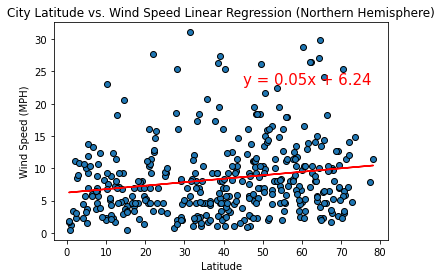

In [71]:
# Define x values and y values
x_values_7 = northern_hemisphere["Lat"]
y_values_7 = northern_hemisphere["Wind Speed"]

# Calculate correlation coefficient
correlation = st.pearsonr(x_values_7, y_values_7)
print(f"The r-squared value is: {round(correlation[0],2)}")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values_7, y_values_7)
regress_values = x_values_7 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot with best fit line
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"], edgecolor = "black")
plt.plot(x_values_7, regress_values,"r-")

# Title plot and label axes and best fit line
plt.title("City Latitude vs. Wind Speed Linear Regression (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.annotate(line_eq,(45, 23),fontsize=15,color="red")

# Save graph as .png
plt.savefig("png_Files/City Latitude vs. Wind Speed Northern Hemisphere Linear Regression.png")

There is a very weak positive correlation between city latitude and wind speed for the northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: -0.39


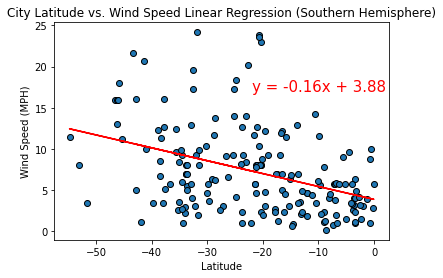

In [72]:
# Define x values and y values
x_values_8 = southern_hemisphere["Lat"]
y_values_8 = southern_hemisphere["Wind Speed"]

# Calculate correlation coefficient
correlation = st.pearsonr(x_values_8, y_values_8)
print(f"The r-squared value is: {round(correlation[0],2)}")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values_8, y_values_8)
regress_values = x_values_8 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot with best fit line
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"], edgecolor = "black")
plt.plot(x_values_8, regress_values,"r-")

# Title plot and label axes and best fit line
plt.title("City Latitude vs. Wind Speed Linear Regression (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.annotate(line_eq,(-22, 17),fontsize=15,color="red")

# Save graph as .png
plt.savefig("png_Files/City Latitude vs. Wind Speed Southern Hemisphere Linear Regression.png")

There is a weak negative correlation between city latitude and wind speed for the southern hemisphere.